# TITANIC 01


Project to aim to predict passenger survival base on a sample data (TRAIN.CSV)
in this project I will crete:

*Data gathering
*Data preprocessing
*Exploratory data analysis (EDA)
*Feature engineering
*Training machine learning Classification models
*Density estimation
*Dimensionality reduction


It wil perfomre by creating a Model pipeline



### Import library

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


#visualization
import datetime

import itertools
import matplotlib
from matplotlib import pyplot
import matplotlib.pyplot as plt


import math
#from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")
from IPython.display import clear_output


import random
#import optuna

from sklearn.utils import class_weight
import tensorflow as tf

#import tensorflow_addons as tfa

from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder, StandardScaler

from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold, KFold, train_test_split, GridSearchCV 
#from catboost import CatBoostClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from sklearn.metrics import log_loss, mean_squared_error,accuracy_score, classification_report, confusion_matrix, roc_curve, auc

from sklearn.pipeline import Pipeline, FeatureUnion 
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest
from sklearn.base import BaseEstimator, TransformerMixin
 



### Importa Data & Stats

In [87]:
df = pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [88]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [89]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [90]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [118]:
 df.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age              177
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           0
FamilySize         0
First name         0
Last name          0
Title              0
Status             0
ticket length      0
Deck             687
dtype: int64

#### TEST

In [92]:
test_df.info

<bound method DataFrame.info of      PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  


In [93]:
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [94]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [95]:
 test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [96]:
 test_df['Cabin'].isnull().sum()

327

### Preprocessing

In [97]:
df.groupby(['Cabin']).count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Cabin,,,,,,,,,,,
A10,1,1,1,1,1,1,1,1,1,1,1
A14,1,1,1,1,1,0,1,1,1,1,1
A16,1,1,1,1,1,1,1,1,1,1,1
A19,1,1,1,1,1,0,1,1,1,1,1
A20,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
F33,3,3,3,3,3,3,3,3,3,3,3
F38,1,1,1,1,1,0,1,1,1,1,1
F4,2,2,2,2,2,2,2,2,2,2,2


In [98]:
df.groupby(['Embarked']).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,445.357143,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144
Q,417.896104,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030
S,449.527950,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812


In [99]:
df[df['Embarked'].isnull()]
#  df[df.isna().any(axis=1)]
#  df[df['Cabin'] == 'B28']
#  df[df['Fare'] > 512]
# df[(df['Status'] != 'Noble') & (df['Status'] != 'Military') & (df['Status'] != 'Common')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [100]:
df["Embarked"] = df["Embarked"].fillna("S")

In [101]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [102]:
df['First name'] = df['Name'].str.split(',|\\.',expand = True)[2] #expand set to True to return a df instead of series
df['First name'] = df['First name'].str.strip() #strip leading and trailing white spaces
df['Last name'] = df['Name'].str.split(',|\\.',expand = True)[0] #expand set to True to return a df instead of series
df['Last name'] = df['Last name'].str.strip()
df['Title'] = df['Name'].str.split(',|\\.',expand = True)[1] #expand set to True to return a df instead of series
df['Title'] = df['Title'].str.strip()

In [103]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,First name,Last name,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Owen Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,John Bradley (Florence Briggs Thayer),Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Laina,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Jacques Heath (Lily May Peel),Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,William Henry,Allen,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,James,Moran,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,Timothy J,McCarthy,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,5,Gosta Leonard,Palsson,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3,Oscar W (Elisabeth Vilhelmina Berg),Johnson,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2,Nicholas (Adele Achem),Nasser,Mrs


In [104]:
df['Title'].value_counts() #just display the name column summary

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Capt              1
Don               1
Mme               1
Lady              1
Jonkheer          1
the Countess      1
Sir               1
Ms                1
Name: Title, dtype: int64

In [105]:
df[df['Title'] == 'Don']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,First name,Last name,Title
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,1,Manuel E,Uruchurtu,Don


In [106]:
def Status(x):
    title=x['Title']
    if title in ['Countess', 'Jonkheer', 'Lady','Sir','Don', 'Dona','the Countess']:
        return 'Noble'
    elif title in ['Major', 'Capt', 'Col']:
        return 'Military'
    elif title in ['Master', 'Mme','Mlle', 'Master','Miss','Mlle','Mme','Mr','Mrs','Ms']:
        return 'Common'
    elif title in ['Dr']:
        return 'Dr'
    elif title in ['Rev']:
        return 'Clergy'
    
    else:
        return Status     

In [107]:
df['Status']=df.apply(Status, axis=1)

In [108]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,First name,Last name,Title,Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Owen Harris,Braund,Mr,Common
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,John Bradley (Florence Briggs Thayer),Cumings,Mrs,Common
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Laina,Heikkinen,Miss,Common
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Jacques Heath (Lily May Peel),Futrelle,Mrs,Common
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,William Henry,Allen,Mr,Common
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,James,Moran,Mr,Common
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,Timothy J,McCarthy,Mr,Common
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,5,Gosta Leonard,Palsson,Master,Common
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3,Oscar W (Elisabeth Vilhelmina Berg),Johnson,Mrs,Common
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2,Nicholas (Adele Achem),Nasser,Mrs,Common


In [109]:
def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme','the Countess']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title
df['Title']=df.apply(replace_titles, axis=1)

In [110]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,First name,Last name,Title,Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Owen Harris,Braund,Mr,Common
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,John Bradley (Florence Briggs Thayer),Cumings,Mrs,Common
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Laina,Heikkinen,Miss,Common
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Jacques Heath (Lily May Peel),Futrelle,Mrs,Common
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,William Henry,Allen,Mr,Common
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,James,Moran,Mr,Common
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,Timothy J,McCarthy,Mr,Common
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,5,Gosta Leonard,Palsson,Master,Common
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3,Oscar W (Elisabeth Vilhelmina Berg),Johnson,Mrs,Common
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2,Nicholas (Adele Achem),Nasser,Mrs,Common


In [111]:
df['ticket length'] = df['Ticket'].apply(lambda x: len(x))

<AxesSubplot:xlabel='Status'>

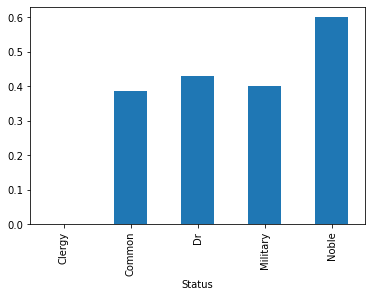

In [112]:
df['Survived'].groupby(df['Status']).mean().plot(kind='bar')

In [114]:
df['Status'].value_counts()

Common      868
Dr            7
Clergy        6
Noble         5
Military      5
Name: Status, dtype: int64

In [116]:
df['Deck'] = df['Cabin'].str.replace('[0-9]','').str.split(' ', expand=True)[0]
#1. delete cabin number, leaving leading letter (deck); 2. since multiple cabins are assigned, just get the first one, they are all on the same deck

In [121]:
df['Deck'].value_counts()

U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Deck, dtype: int64

In [120]:
df["Deck"] = df["Deck"].fillna("U")

<AxesSubplot:xlabel='Deck'>

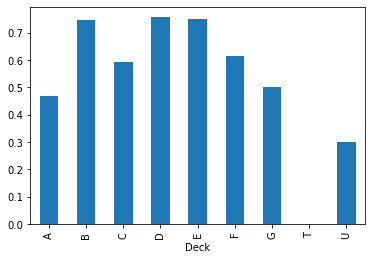

In [122]:
df['Survived'].groupby(df['Deck']).mean().plot(kind='bar')